In [1]:
from IPython.display import Image
import matplotlib as mpl
mpl.rcParams['font.family'] = "NanumGothic"
mpl.rcParams['font.size'] = 20


# 1. RNN 이전의 언어모델과 CBOW의 관련성을 살펴보고
# RNN의 탄생배경을 이해해보자

### 언어 모델은 단어 나열에 확률을 부여한다.   
특정한 단어의 시퀀스에 대해서, 그 시퀀스가 일어날 가능성이 어느 정도인지를(그 시퀀스가 얼마나 자연스러운 순서인지를) 확률로 평가한다 

언어모델로 할 수 있는 대표적인 일은 새로운 문장을 생성하는 것이다.   
단어 순서의 자연스러움을 확률적으로 평가할 수 있으므로   
그 확률 분포에 따라 다음으로 적합한 단어를 샘플링 할 수 있기 때문이다

W1, W2, ... Wm 이라는 m개의 단어로 된 문장이 있을 때   
단어들이 위 순서대로 출현할 확률을 P(W1, W2, ... Wm) 이라고 한다면   
### 이 확률은 여러 사건이 동시에 일어날 확률이므로 동시확률이 된다

### 동시확률은 사후확률을 사용해 다음과 같이 분해하여 쓸 수 있다.

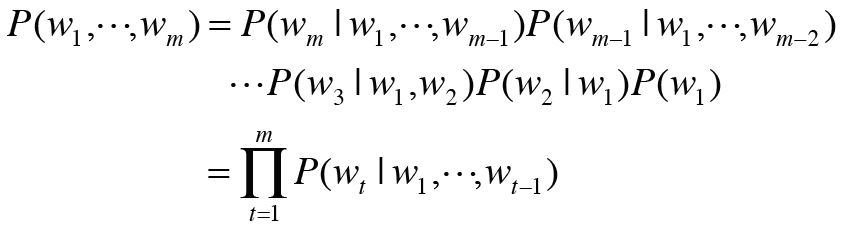

In [11]:
Image("6.png")

P(W1) = P(W1 | W0)

Π 파이 기호는 모든 원소를 곱하는 총곱을 뜻한다.   
### 즉 동시확률은 사후확률의 총곱으로 나타낼 수 있다

이는 확률의 곱셈정리로부터 유도할 수 있다

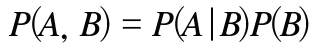

In [12]:
Image("7.png")

이 정리가 의미하는 바는   
A와 B가 모두 일어날 확률은   
B가 일어날 확률과, B가 일어난 후 A가 일어날 확률을   
곱한 것과 같다   
이다.

P(A,B) = P(B|A) P(A) 로 써도 된다.

따라서 P(W1, W2, ... Wm) 은 아래와 같이 다시 나타낼 수 있다

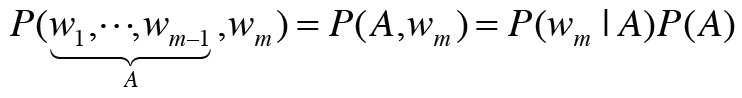

In [13]:
Image("8.png")

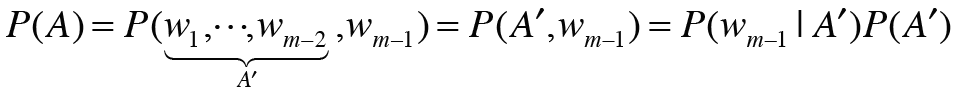

In [14]:
Image("9.png")

이런식으로 매번 사후확률로 분해하면 아래 식이 나온다

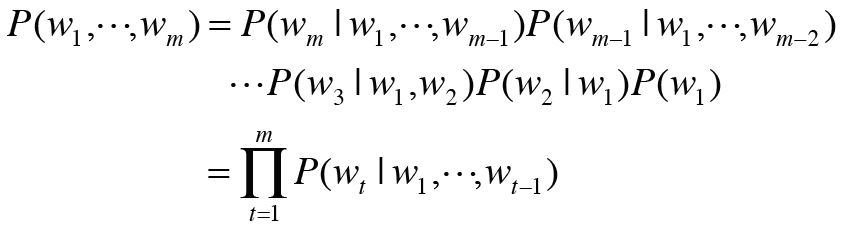

In [15]:
Image("6.png")

정리하면   
W1, W2, ... Wm 이라는 m개의 단어로 된 문장이 있을 때   
단어들이 위 순서대로 출현할 확률 P(W1, W2, ... Wm)은    
P(Wm|W1, W2, ... Wm-1)를 계산할 수 있다면 구할 수 있게 된다   

### Word2vec의 CBOW모델은 단어의 분산표현을 얻기 위해 고안된 기법이다.   
### 그런데 이 아이디어는 기본적으로 언어모델의 원리를 응용한 것이다.  

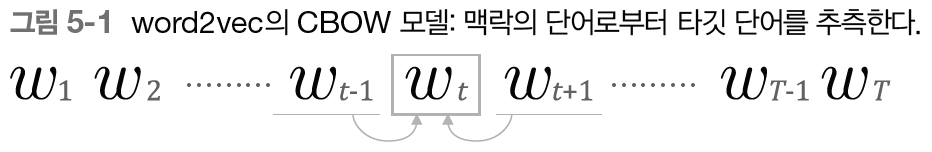

In [3]:
Image("1.png")

Wt-1, Wt+1이 주어졌을 때 타깃이 Wt이 될 확률을 수식으로 나타내면 아래와 같다.

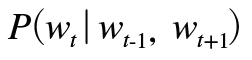

In [4]:
Image("2.png")

### 이것을 다르게 표현하면 CBOW 모델은 사후확률을 모델링 한다고 말할 수 있다.

여기서 왼쪽 윈도우만 맥락을 고려한다고 했을 때는 다음과 같이 나타낼 수 있다.

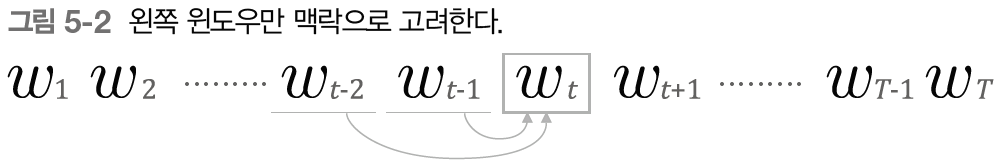

In [6]:
Image("3.png")

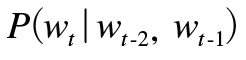

In [7]:
Image("4.png")

이 경우 왼쪽 윈도우만 고려하는 CBOW 모델의 손실함수는 아래와 같이 나타낼 수 있다.

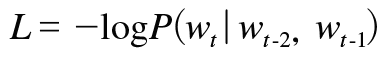

In [8]:
Image("5.png")

왼쪽 윈도우만 고려하는 CBOW 모델은 위 손실함수를 최소화하는 가중치 매개변수를 학습한다.   
그 결과 우리는 **맥락으로부터 타깃을 정확하게 추측**할 수 있게 된다.   
여기서 맥락으로부터 타깃을 추측하는 것이 바로 **언어모델**이 하는 일이다.   
왼쪽 윈도우만 고려하는 CBOW 모델은 일종의 N-gram 언어모델이라고 볼 수도 있다.   


## 실제로 언어모델은 학습의 부산물로 단어의 의미가 인코딩된 단어의 분산표현을 얻을 수 있다.   
### Word2vec은 보다 질 좋은 단어임베딩을 얻기 위해 **다음 단어**가 아닌 **중심단어** 혹은 **주변단어**를 예측하게 하고 네거티브 샘플링 등을 사용함으로써   
###  언어모델을 임베딩 기능에만 충실한 모델로 바꾼 것이다 

CBOW에서는 맥락 안의 단어 순서가 무시된다는 사실도 언어모델과 다른 점이다.   
CBOW란 continuous bag of words의 약어로서 백오브워즈는 기본적으로 순서가 무시된다는 걸 전제하고 있다.

아래 그림의 왼쪽에서도 보이듯이 CBOW 모델에서는 은닉층에서 단어 벡터들이 더해지므로 단어 순서는 무시된다.

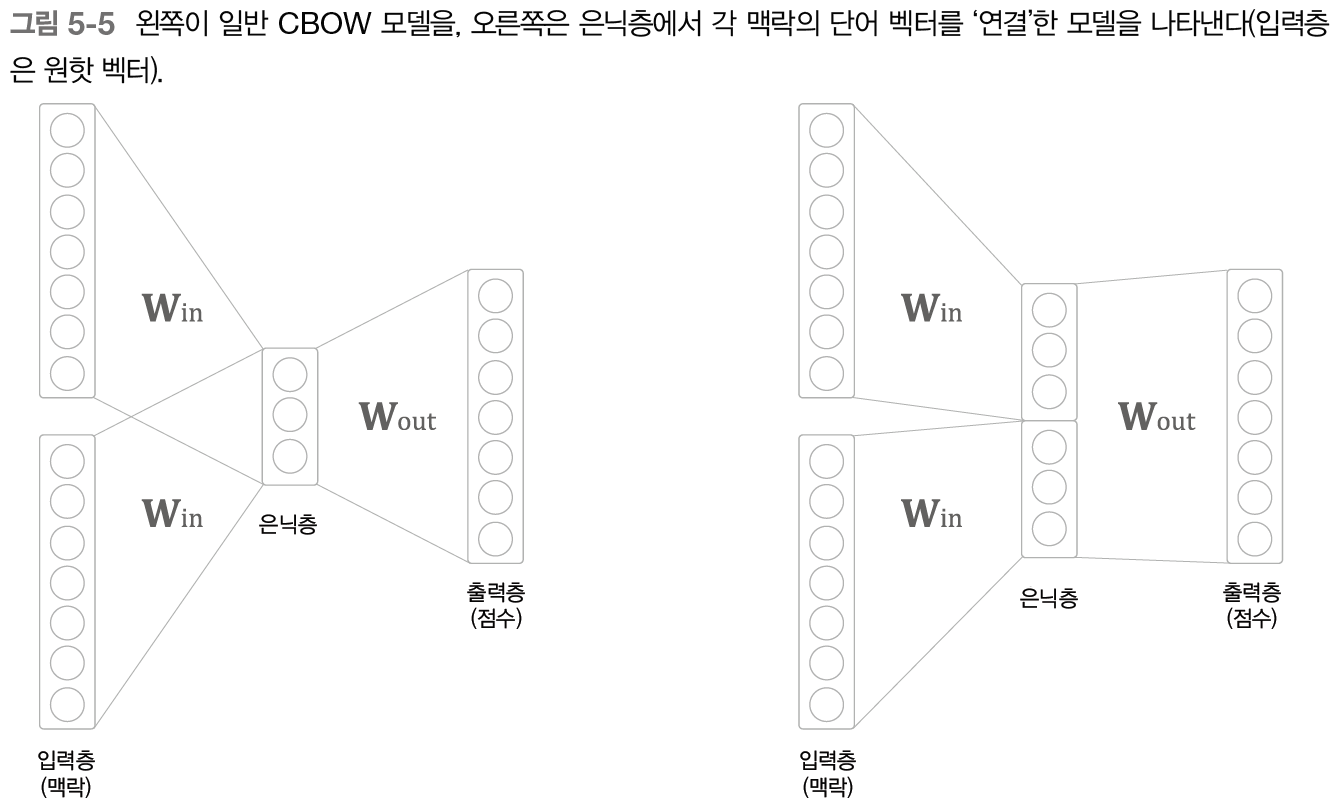

In [24]:
Image("10.png", height = 600, width = 800)

반면 오른쪽 그림은 맥락단어의 순서도 고려할 수 있게끔, 맥락의 단어벡터를 연결해주는 데   
NPNM (Neural Probabilistic Language Model) 은 이 방식을 취하는 언어모델이다.   
더 정확히는 아래 그림과 같다. https://wikidocs.net/45609 참고

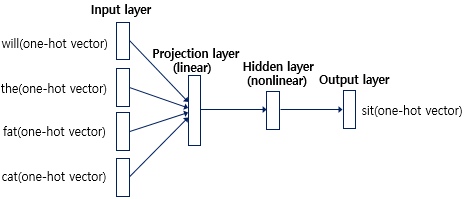

In [29]:
Image("11.png", height = 600, width = 800)

그러나 뉴럴넷을 사용한 언어모델의 시초인 NPLM에는 여러 가지 문제가 있다.   
1. N-gram 방식을 사용하므로 맥락을 벗어난 단어의 정보는 무시된다.   
2. 맥락단어벡터를 연결하는 방식을 취하면 맥락의 크기에 비례해 가중치 매개변수도 늘어나게 되는 문제가 생긴다   
3. 또한 NPNM은 기본적으로 Feed forward 신경망 : 흐름이 단방향인 신경망이다.   
>>> 피드 포워드 뉴럴넷의 단점 : 시계열 데이터를 잘 다루지 못한다   

### 이 문제를 해결한 것이 순환 신경망 RNN이다.

참고 : RNN을 이용한 언어모델은 2010년, Word2vec은 2013년에 제안되었다

RNN은 Recurrent Neural Network (순환신경망)이다.   
Recursive Neural Network (재귀신경망)이란 것도 있는데   
이건 주로 트리 구조의 데이터를 처리하기 위한 신경망으로 RNN과 다른 것이다 
    

# 2. RNN의 구조적 특징

## 1) 순전파

### RNN의 특징은 순환하는 경로( 닫힌 경로)가 있다는 것이다.   
### RNN은 구조적으론 맥락이 아무리 길더라도 그 맥락의 정보를 기억할 수 있는 메커니즘을 갖추고 있다

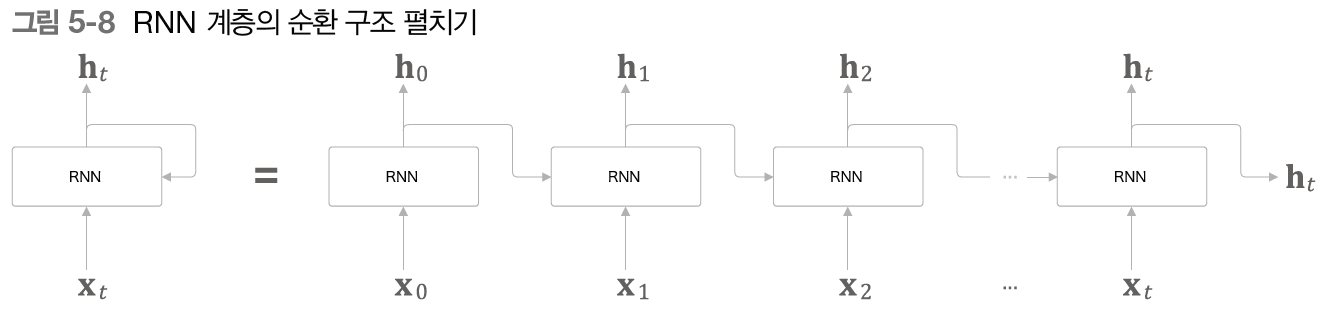

In [31]:
Image("12.png")

t : 시각     
Xt : 각 시각에 입력되는 벡터 (단어 벡터)   
ht : 각 시각의 출력값   

왼쪽이 영화면, 오른쪽에 펼친 건 필름이다

### RNN이 일반적인 피드포워드 뉴럴넷과 다른 점은 하나의 계층 안에서 순환한다는 점이다   
수식으로 나타내면 다음과 같다

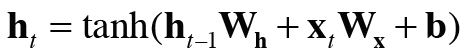

In [34]:
Image("13.png")

### 하나의 RNN 계층에는 가중치가 2개 있다.   
1. 매 시각 RNN 계층에 입력되는 X와 곱해지는 가중치 Wx   
2. 이전 시각의 출력값 ht-1 과 곱해지는 가중치 Wh

참고로 xt와 ht-1은 행벡터이다

###  RNN은 h라는 상태를 가지고 있으며 위 식에 의해 상태가 매 시각마다 갱신된다고 해석할 수 있다

ht는 hidden state, hidden state vector라고 표현한다

## 2) 역전파

### BPTT (backpropagation through time) : RNN의 오차역전파는 "시간 방향으로 펼친 신경망의 오차역전파법"이란 뜻으로 BPTT라 부른다.

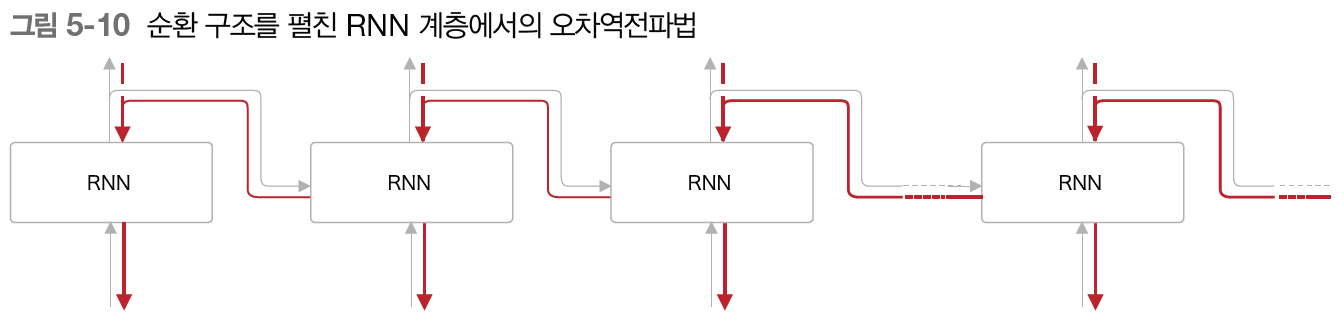

In [36]:
Image("14.png")

    BPTT를 구하려면 매 시각 RNN 계층의 중간데이터(현재 시각 입력값 x, 이전 시점 은닉 상태 h_prev, 현재 시각 출력되는 은닉 상태 h_next)를 저장해놔야 한다.   
    시계열 데이터 길이가 길어지면 메모리 사용량이 증가하게 된다.   
    그에 따른 연산량도 늘어난다   
    또 시계열 데이터 길이가 긴 경우 역전파시 기울기가 불안정해진다

### truncated BPTT : 전체 시계열 데이터의 순전파는 연결하고, 역전파의 연결만 일정 길이로 끊는 BPTT

길이가 1000인 데이터를 10씩 잘라 BPTT를 수행하는 예시

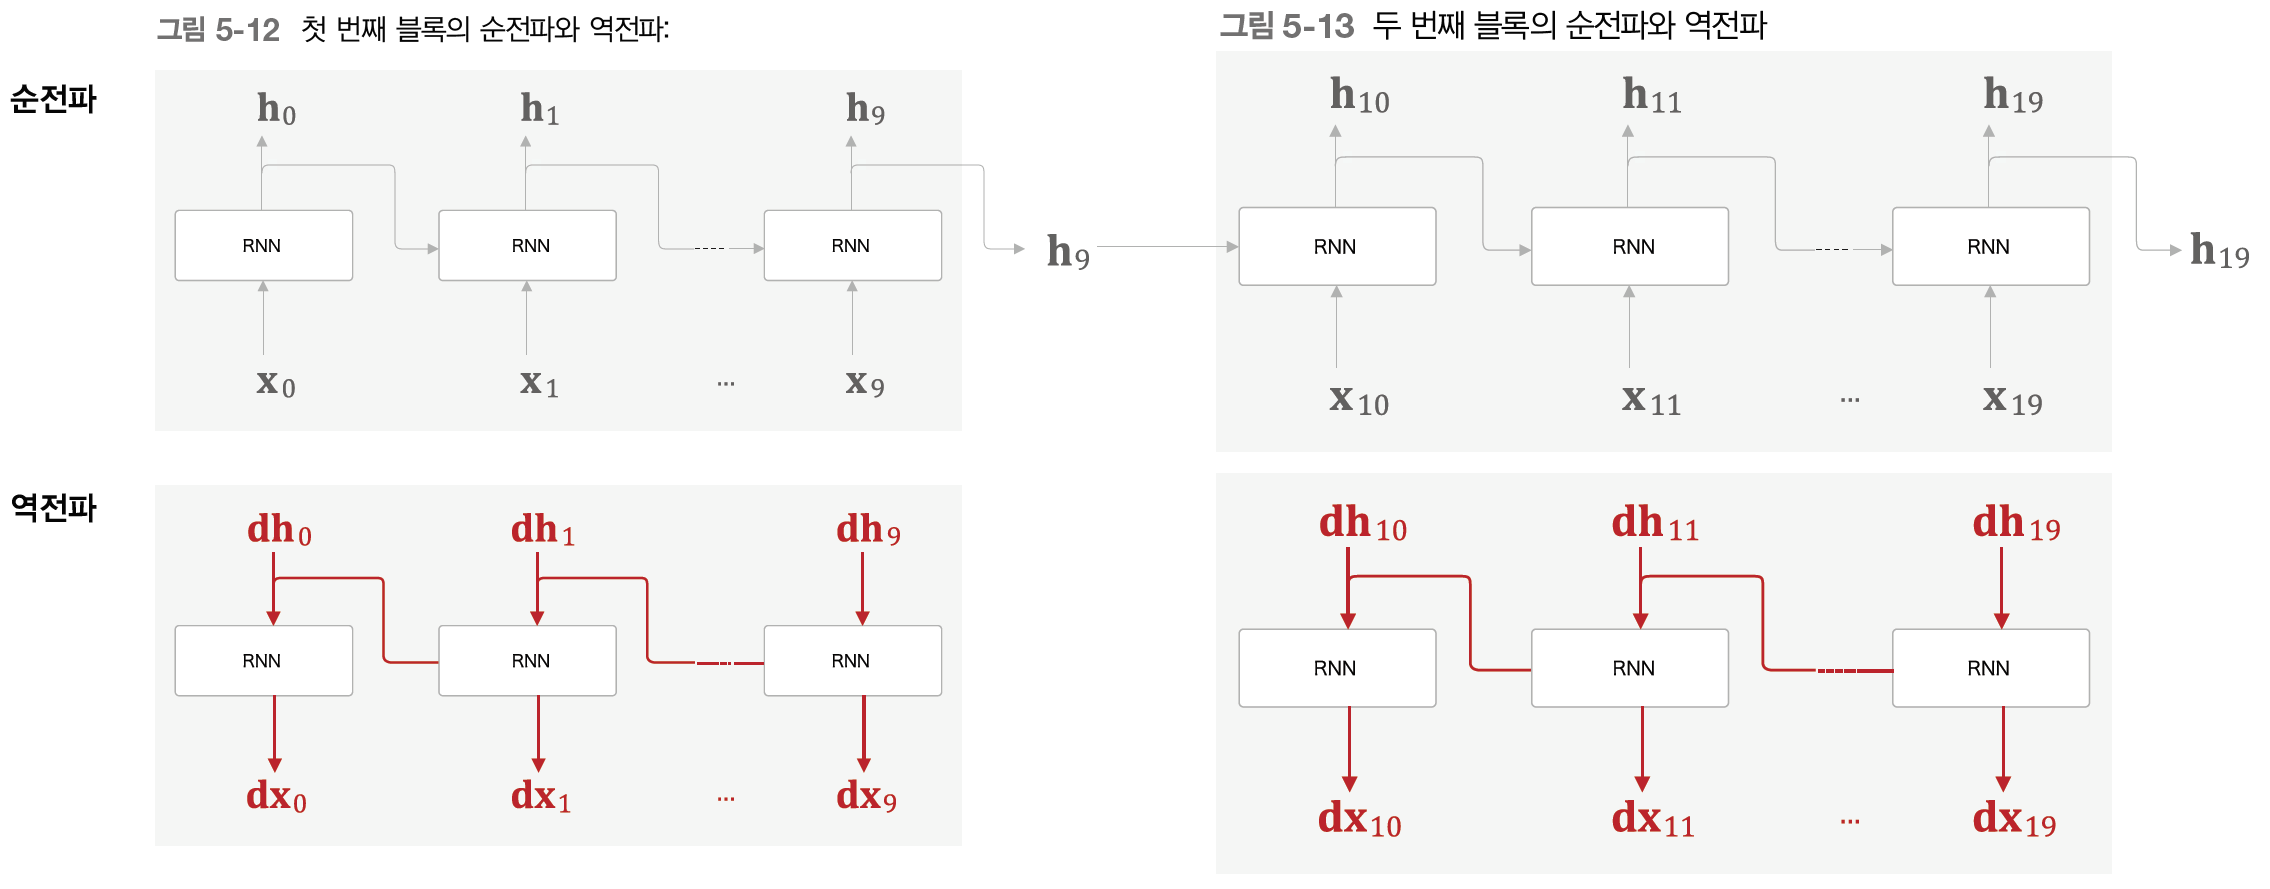

In [42]:
Image("15.png", height = 1000, width = 1200)

첫번째 블록에서 순전파, 역전파해서 학습한 가중치 행렬 Wh, Wx, b를 두 번째 블록으로 보낸다   
두번째 블록에서 학습한 걸 다시 세번째 블록으로 보낸다.

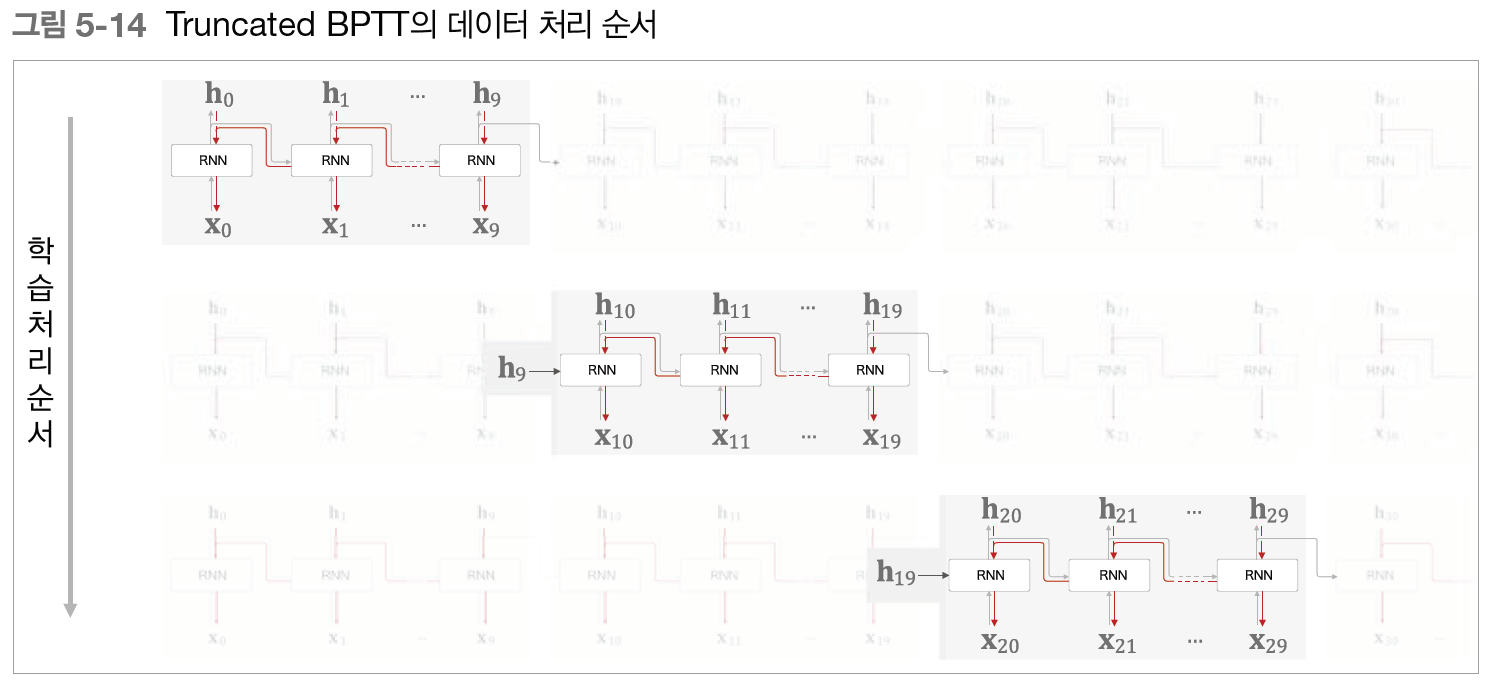

In [44]:
Image("16.png", height = 1000, width = 1200)

각 chunk 들은 자기 앞의 chunk에서의 역전파 계산이 끝나고 가중치 업데이트가 이뤄지고 난 뒤에야   
자신의 역전파와 업데이트를 수행할 수 있다.    
그래서 마지막 chunk까지 역전파와 업데이트가 끝나야   
1회의 전체 뉴럴넷 업데이트가 끝난다.    

어차피 전체 시퀀스에 대해 똑같은 가중치 행렬이 쓰이므로   
이렇게 계산해도 가중치 행렬은 업데이트가 되고   
끊지 않고 한번에 했을 때 값에 어느 정도 근사하게 된다.    
   
    헷갈리면 안되는게 이건 하나의 긴 시퀀스를 처리하는 방법이다.    

이걸 배치처리 하게 되면   
여러 개의 시퀀스를 동시에 병렬적으로 truncated BPTT 하는 것.   

만약 길이가 1000짜리 시계열 데이터를 배치처리한다면   
에를 들어 2개의 미니배치로 나눠 학습하고자 한다면   
두번째 미니배치는 X500 부터 시작하게 된다.

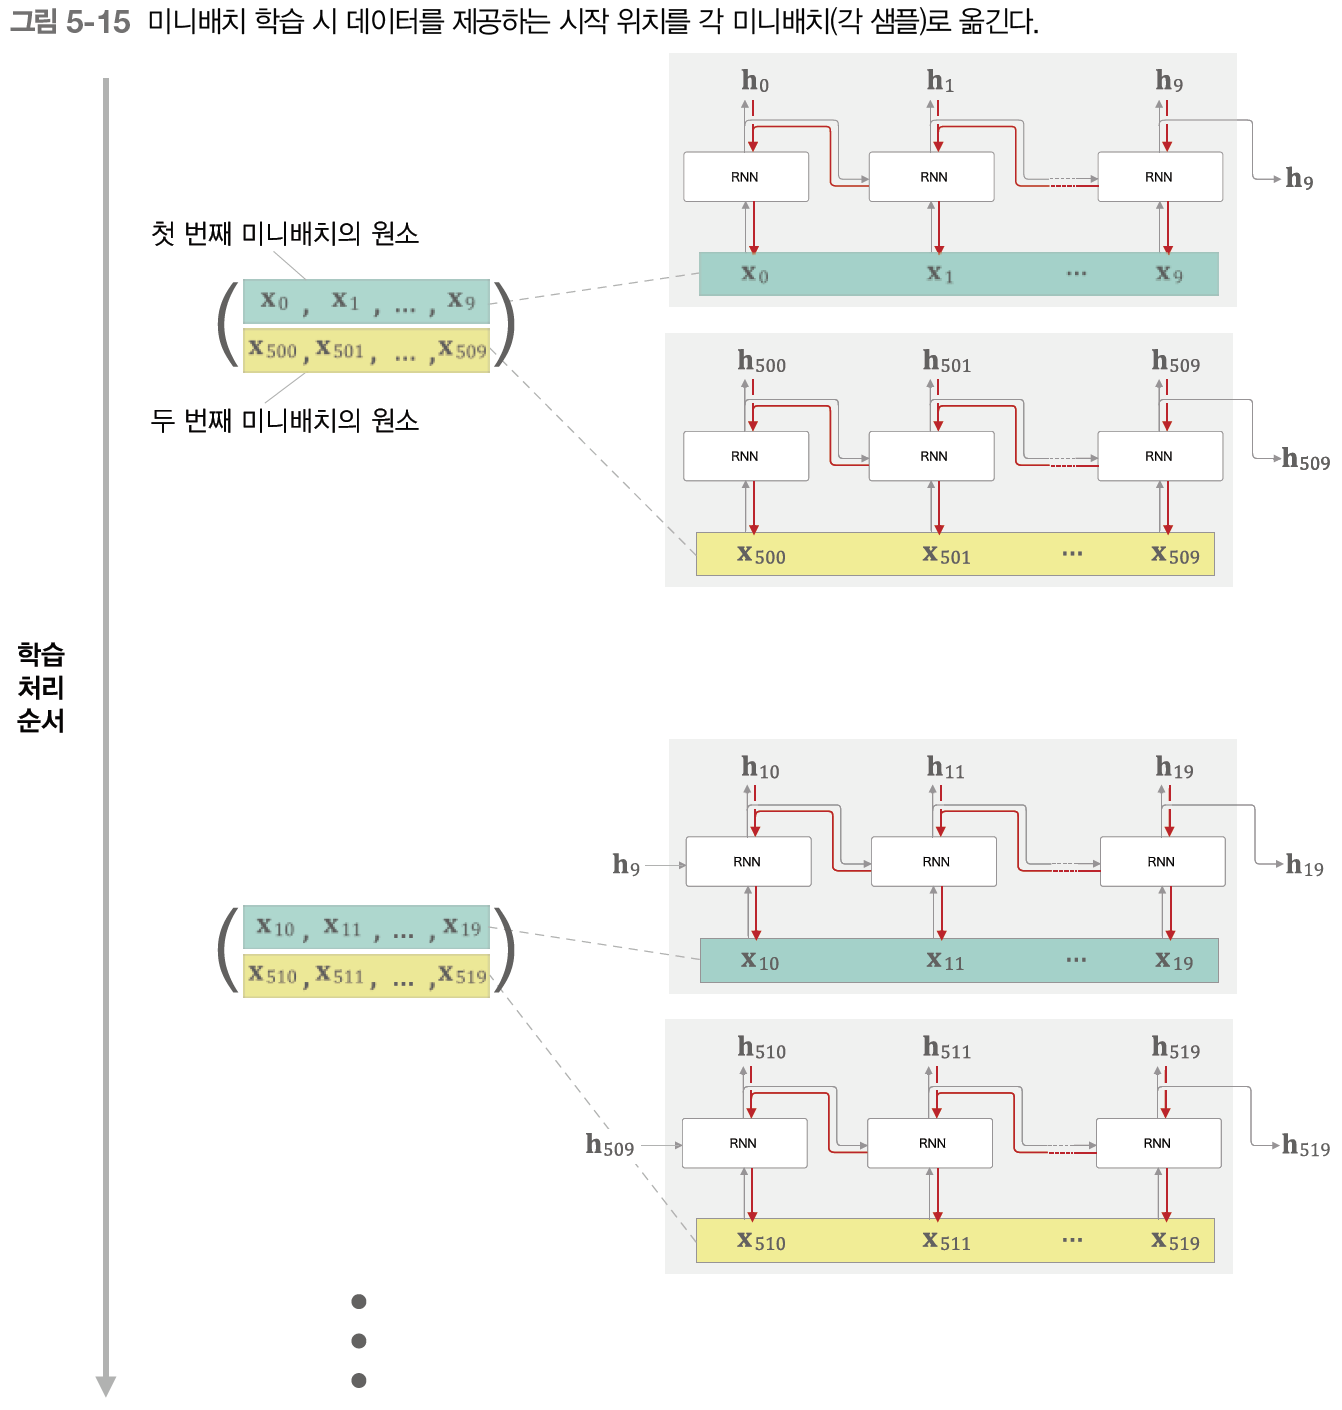

In [47]:
Image("17.png", height = 1000, width = 1200)

근데 이렇게 하면 길이가 1000짜리 시계열 데이터가 반으로 쪼개져   
500ㅡ999까지의 시퀀스는 그 이전의 0ㅡ499 까지의 시퀀스 정보를 이어 받지 못한다는 문제가 생긴다

# 3. RNN 구현

### 1) 길이가 T인 시계열 데이터 xs를 받는다고 할 때    
### RNN을 T번 돌리는 계층을 Time RNN 계층이라 부르겠다   
(truncated BPTT를 고려한 구현)

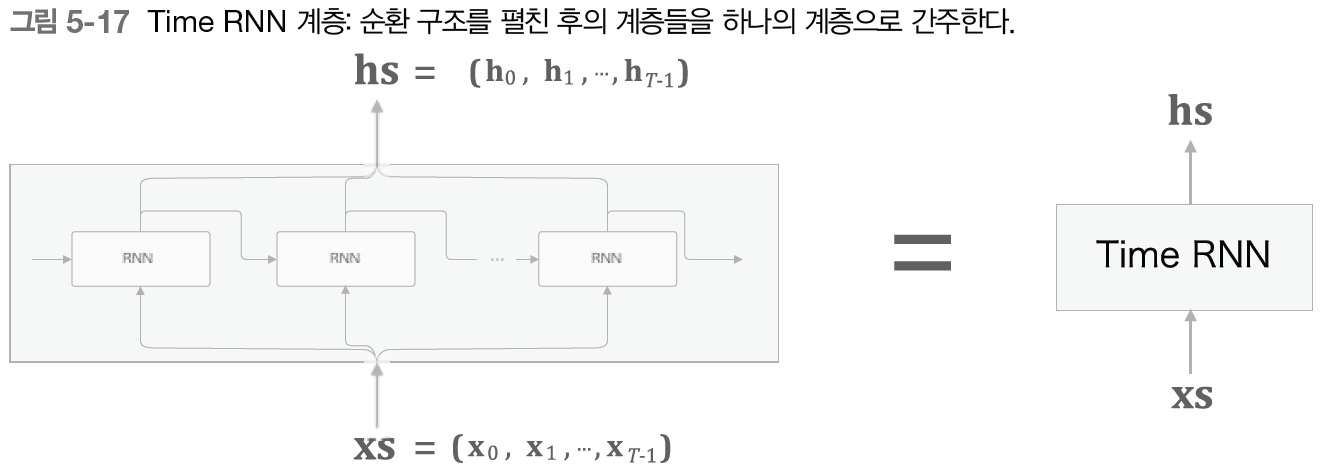

In [49]:
Image("18.png", height = 800, width = 1000)

### 먼저 한 타임스텝만 처리하는 RNN 계층 구현

    xt, ht-1 은 각각 D차원(입력벡터의 차원수), H차원(은닉 상태 벡터의 차원수)의 행벡터다.   
    따라서 배치처리를 하게 되면 배치 사이즈(미니배치 크기) N이 된다.

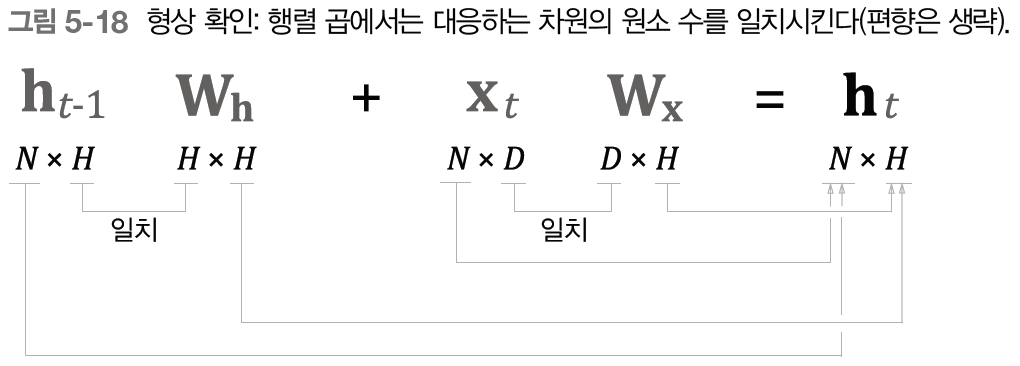

In [58]:
Image("19.png", height = 200, width = 600)

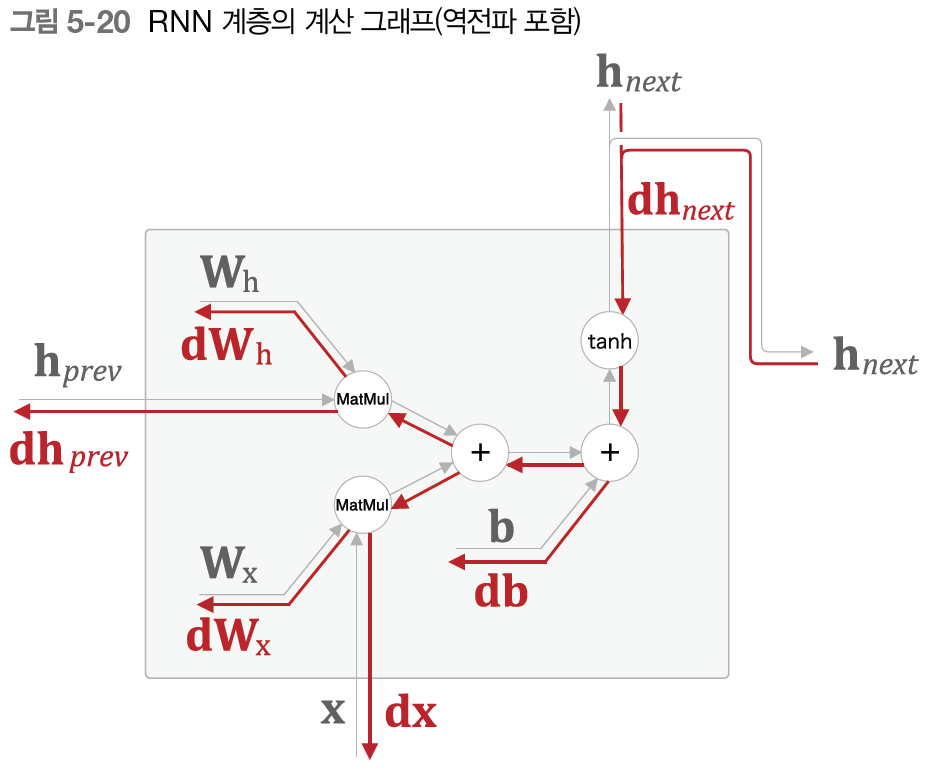

In [55]:
Image("20.png", height = 800, width = 600)

In [1]:
class RNN:
    def __init__(self, Wx, Wh, b):  # RNN 클래스 인스턴스 생성시 인수로 가중치 2개와 편향 1개를 받고
        self.params = [Wx, Wh, b]   # params 리스트에 저장한 다음
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]  # 기울기를 담을 영행렬도 grads 리스트에 담아두고
        self.cache = None       # 역전파 계산시 중간 데이터를 담을 cache를 None으로 초기화 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        
    def forward(self, x, h_prev):
        Wx, Wh, b = self.params
        t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b  # 여기서 편향 b의 덧셈은 배치사이즈 개수만큼 브로드캐스트가 일어나기 때문에 repeat node를 사용 <<<<<<<<<<
        h_next = np.tanh(t)
        
        self.cache = (x, h_prev, h_next)  # 역전파 계산시 중간 데이터(현재 입력, 이전 은닉 상태, 현재 출력)를 담을 cache
        return h_next
    
    def backward(self, dh_next):
        Wx, Wh, b = self.params
        x, h_prev, h_next = self.cache
        
        dt = dh_next * (1 - h_next**2)  # upstream gradient * local gradient(x에 대한 tanh(x)의 미분, dtanh x / dx = 1 - y제곱)
                                        # https://questionet.tistory.com/23?category=961868 참고 
        db = np.sum(dt, axis = 0)  # repeat node의 역전파는 sum node
        dWh = np.matmul(h_prev.T, dt)
        dh_prev = np.matmul(dt, Wh.T)
        dWx = np.matmul(x.T, dt)
        dx = np.matmul(dt, Wx.T)
        
        self.grads[0][...] = dWx   # [...] 생략기호 ellipsis : 넘파이 배열의 덮어쓰기 수행, 은 복사     
        self.grads[1][...] = dWh   # self.grads[0]의 메모리 위치는 변하지 않고, 그 주소에 dW의 원소가 복사된다.
        self.grads[2][...] = db    # self.grads[0] = dWx  이렇게 '할당'하면 얕은 복사.  self.grads[0] 가 가리키는 주소가 dWx로 바뀔뿐)
        
        return dx, dh_prev

# 4.Time RNN 계층 구현

Time RNN 계층은 위 RNN 계층을 T개(길이가 T인 시계열 데이터) 연결한 것이다.   
이전 블록의 마지막 은닉 상태h를 다음 블록에서 넘겨 받아 쓰기 위해   
Time RNN 계층에서는 은닉상태를 인스턴스 변수 h로 보관한다

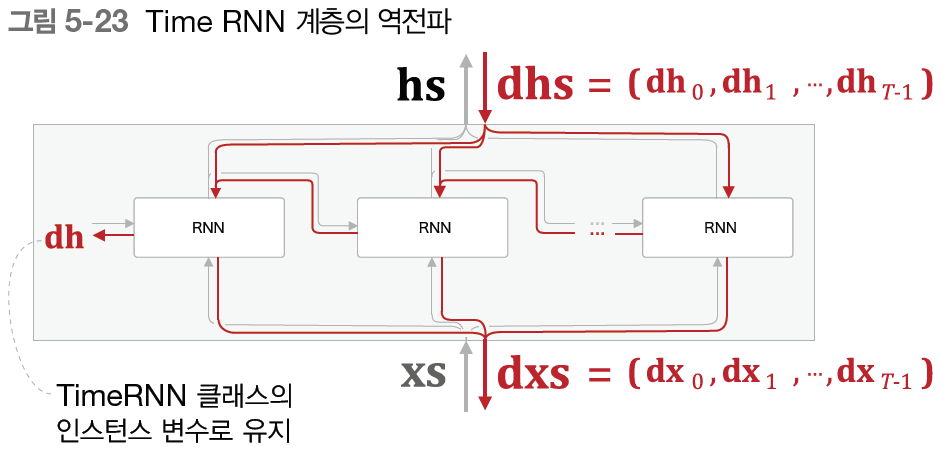

In [4]:
Image("21.png", height = 600, width = 800)

In [2]:
class TimeRNN:
    def __init__(self, Wx, Wh, b, stateful=False): # TimeRNN 클래스 인스턴스 생성시 인수로 가중치 2개와 편향 1개를 받고
                                                   # stateful : 이전 블록의 마지막 RNN 계층의 은닉상태 h를 인계받을지 여부 
        self.params = [Wx, Wh, b]   # params 리스트에 저장한 다음
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]  # 기울기를 담을 영행렬도 grads 리스트에 담아두고
        
        self.layers = None   # T개의 RNN 계층을 저장하는 리스트
        
        self.h, self.dh = None   # self.h 는 forward()를 호출했을 때 마지막 RNN계층의 은닉 상태를 저장하고
                                  # self.dh는 backward()를 호출했을 때 앞에 있는 블록의 은닉상태의 기울기를 저장한다.  ??????????????????????????
        self.stateful = stateful   # stateful=True 면 TimeRNN 계층의 순전파를 끊지 않고 전파
                                   # stateful=False 면 은닉상태를 영행렬로 초기화 
        
    def set_state(self, h):
        self.h = h
        
    def reset_state(self):
        self.h = None
        
    def forward(self, xs):     #    xs : 길이가 T인 시계열 데이터 = x가 T개 있다 
        Wx, Wh, b = self.params
        N, T, D = xs.shape      # N : 배치 사이즈    T : 시퀀스의 길이   D : 입력 벡터(시퀀스의 각 원소)의 차원   
        D, H = Wx.shape         # D : 입력 벡터의 차원   H : 은닉상태의 차원
                                # RNN계층에서  Xt x Wx = (N x D) X (D x H)
        
        self.layers = []
        
        hs = np.empty((N, T, H), dtype='f')   # 매 타임 출력값을 담는다 
        
        if not self.stateful or self.h is None:  # stateful = False 이거나  RNN을 맨 처음 돌릴 땐 
            self.h  = np.zeros((N, H), dtype='f')  # h를 영행렬로 초기화 
            
        for t in range(T):             # 길이가 T인 시계열 데이터 x를 매 타임스텝마다 RNN에 넣는 연산 
            layer = RNN(*self.params)  # TimeRNN 클래스 인스턴스 생성시 인수로 받은 Wx, Wh, b를 RNN클래스 인스턴스인 layer 생성시 넣어주고
                                    # *은 리스트의 원소들을 추출해 메서드의 인수로 전달한다. 
            self.h = layer.forward(xs[:, t, :], self.h)  # 매 타임스텝마다 RNN의 forward()를 호출해서 h_next를 구하고 
                                                         # (여기서 self.h는 이전 은닉상태 h_prev, 맨처음 돌릴 떈 0이다)
                        # 역전파 계산시 쓸 중간 데이터(현재 입력, 이전 은닉 상태, 현재 출력h_next)를 cache에 담은 다음
                         # self.h를 현 스텝에서 계산한 h_next로 갱신해준다.
                         # TimeRNN 인스턴스 생성시 stateful=True로 초기화하면 
                         # RNN forward() 호출시마다 h가 계속 갱신되면서 다음 RNN 계층으로 넘겨진다.
                        
            hs[:, t, :] = self. h   # 매 타임 RNN 계층의 출력값을 T번만큼 hs에 저장하고
            self.layers.append(layer) # 한 RNN 계층 연산이 끝날때마다 사용한 RNN 계층들을 순서대로 layers 에 보관한다. 
                                      # 역전파때 거꾸로 꺼내서 쓰려고 !!!!!!!!!!!!!!
            
        return hs  # 길이가 T인 시계열 데이터를 RNN에 넣고 돌려 얻은 매 타임 스탭마다의 출력값들을 모은 hs 반환
    
    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape      # N : 배치 사이즈    T : 시퀀스의 길이   H : 은닉상태의 차원  # hs의 shape 이 N, T, H 이므로
        D, H = Wx.shape         # D : 입력 벡터의 차원,   H : 은닉상태의 차원
        
        dxs = np.empty((N, T, D), dtype='f')  # xs의 shape이 N, T, D 이므로
        dh = 0
        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]    # 마지막 RNN 계층부터
            dx, dh = layer.backward(dhs[:, t, :] + dh)  ## RNN 클래스의 backward() 호출  (dhs[:, t, :] + dh = dh_next)
                         # truncated BPTT 이므로 각 블록의 맨 뒤쪽 RNN계층은 뒤 블록에서 계산된 dh_prev를 받지 않는다. 
                         # 그래서 맨 처음 dh는 0, 그 앞에서부터는 dh를 이어 받아서 매타임 dhs와 더한 값을 upstream gradient로 하여
                         # dWx, dWh, db, dh_prev, dx를 계산
                         # 이런 식으로 각 블록의 맨 뒤 RNN계층의 기울기를 차례로 계산해서 dx, dh_prev 를 구해 dx, dh에 저장하고
            dxs[:, t, :] = dx  # 매 타임 계산된 dx는 T길이만큼 dxs에 저장된다. 
                               # dh 값은 계속 갱신되어서 아래 self.dh = dh 에 최종값 저장
                
                # 이중 for문 이므로 일단 맨 마지막 RNN계층의 기울기를 구한 다음
                # 아래 for문에서 grads 업데이트후 위 for문으로 돌아와 역전파. 반복.
            
            for i, grad in enumerate(layer.grads):
                grads[i] += grad
                # RNN클래스의 이니셜라이저에 self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)] 
                # RNN클래스의 backward()가 호출되면 grads에 매 타임 dWx, dWh, db가 저장, 이 저장된 값을 차례대로 뽑아서 
                # TimeRNN클래스의 backward()안에 있는 grads에 누적합 (기울기 업데이트)
                # RNN 계층들은 똑같은 가중치를 사용하므로 
                # TimeRNN 계층의 최종 가중치의 기울기는 각 RNN 계층의 가중치 기울기를 모두 더한 게 된다.
                
        for i, grad in enumerate(grads):
            self.grads[i][...] = grad    # 길이가 T인 시계열 데이터를 순전파하고 역전파하여 업데이트를 끝낸 한 블록의 최종 기울기를 
                                         # TimeRNN의 self.grads에 dWx, dWh, db 순서대로 깊은 복사.
                
        self.dh = dh  # 얘는 여기 RNN에선 필요 없는데 seq2seq의 decoder에서 encoder로 기울기를 넘겨줄 때 필요하다
        
        return dxs   # dxs를 왜 리턴하는거지?  RNN을 2층 이상 쌓을 때 dxs는 상류의 기울기 upstream gradient dhs가 된다. 
                                            # 1층일떈 임베딩 학습시키기 위한 upstream gradient

    def set_state(self, h):
        self.h = h

    def reset_state(self):
        self.h = None

# 5. RNNLM 구현

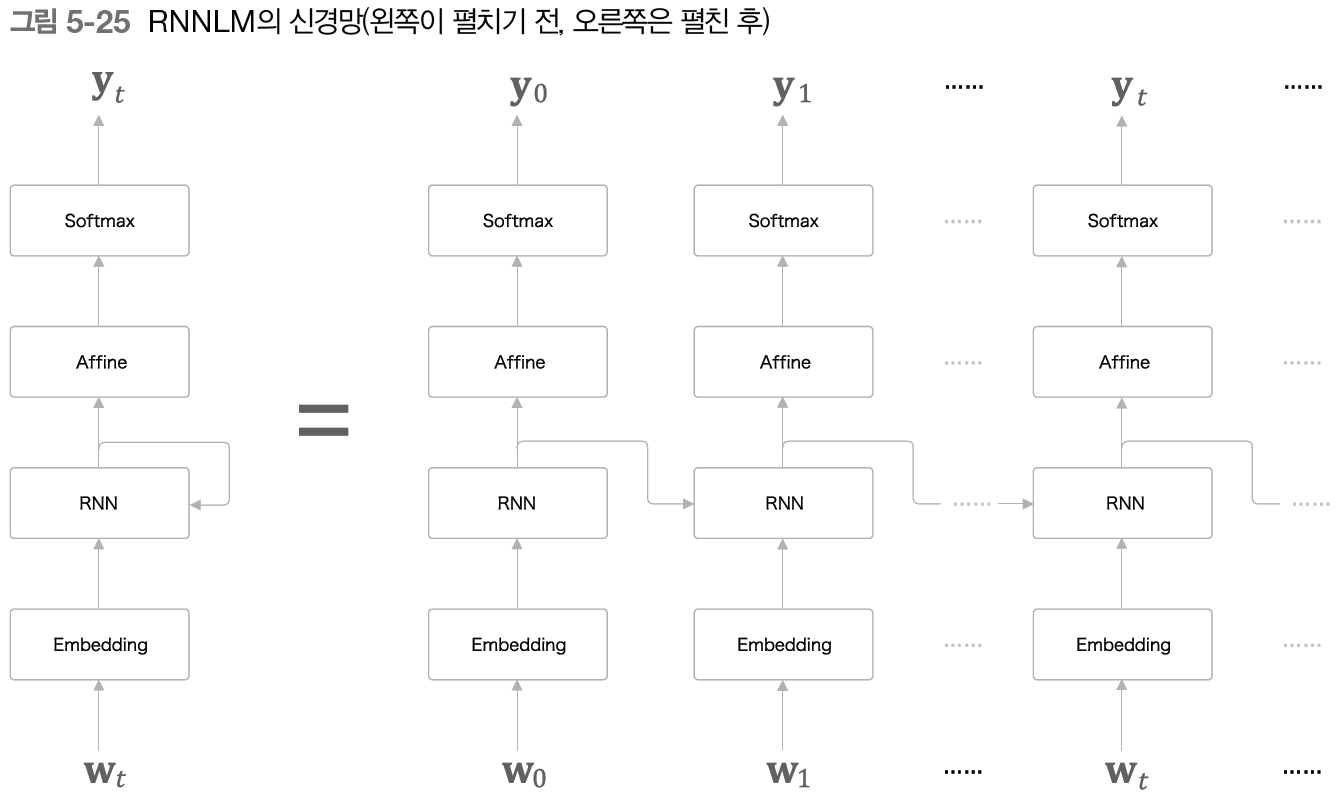

In [7]:
Image("22.png", height = 600, width = 800)

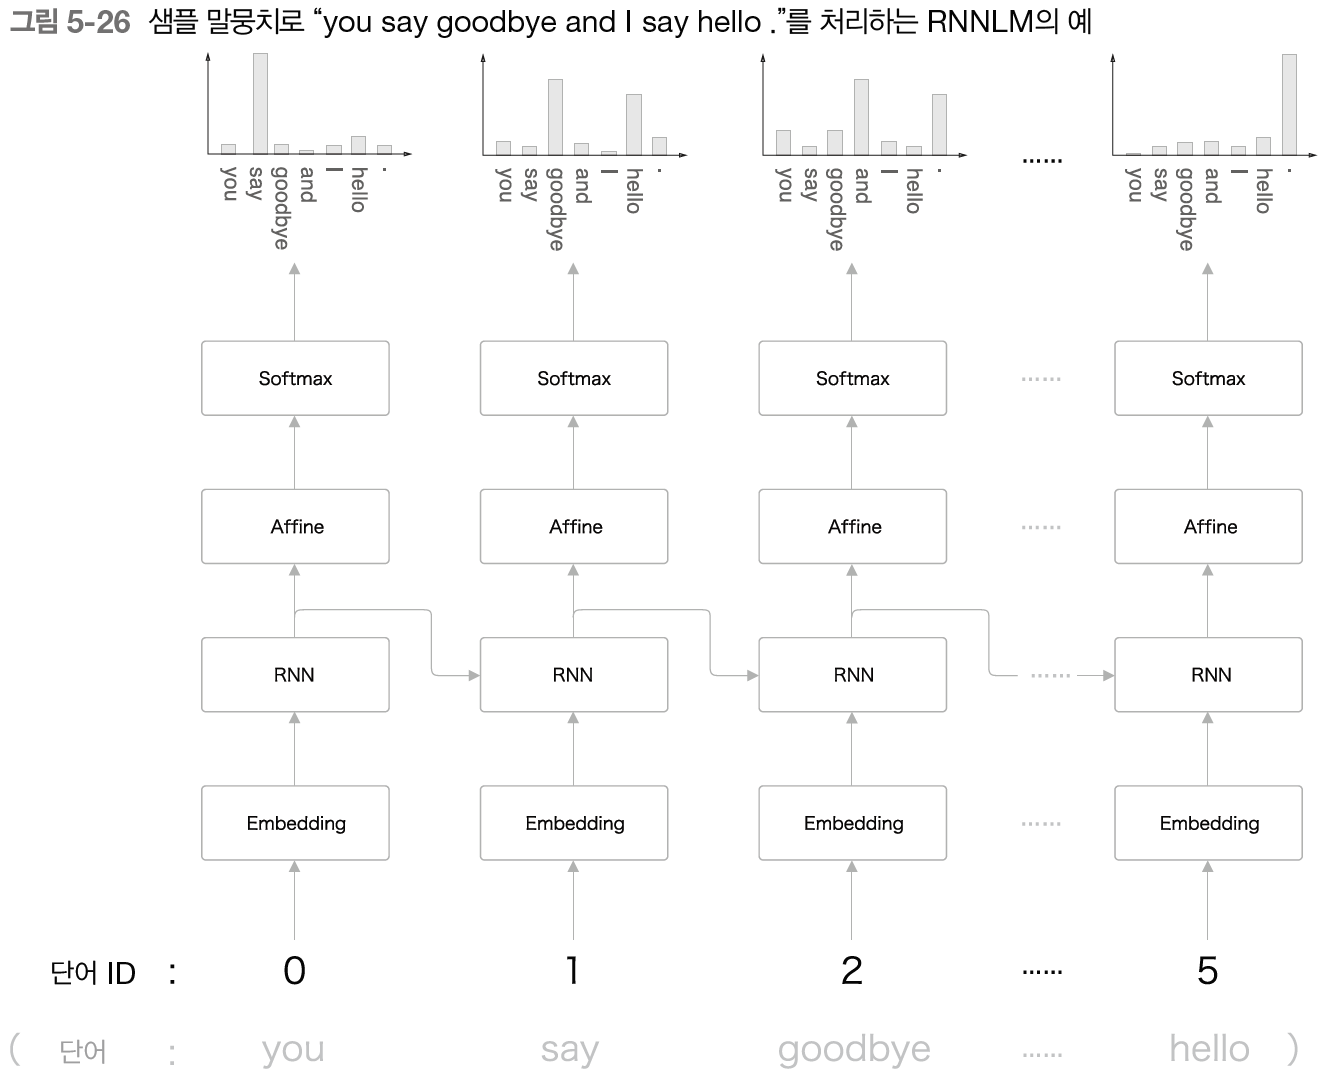

In [8]:
Image("23.png", height = 600, width = 800)

    1 입력데이터는 단어ID의 배열   
    2 임베딩 레이어에서 곧바로 해당 단어 ID의 단어벡터를 추출   
    3 첫번째 RNN계층에 입력   
    4 affine, softmax 통과후 예측한 단어 출력   
    5 두번째 단어 ID 입력 > 임베딩 레이어에서 해당 단어 ID 벡터 추출 > 두번째 RNN 계층에 입력   
    6 동시에 이전 시점의 은닉상태벡터도 두번째 RNN계층에 입력   
    7 affine, softmax 통과후 예측한 단어 출력   
    8 RNN의 첫번째, 두번째 은닉벡터가 you, say의 맥락을 잘 기억하고 있다면 goodbye가 출력될 것

이제 필요한 것은   
길이가 T인 시계열 데이터를 한번에 처리할 수 있는 TimeEmbedding, TimeAffine, TimeSoftmaxWithLoss 계층 구현   
원리는 TimeRNN과 비슷   
각 계층을 T개 준비해서 

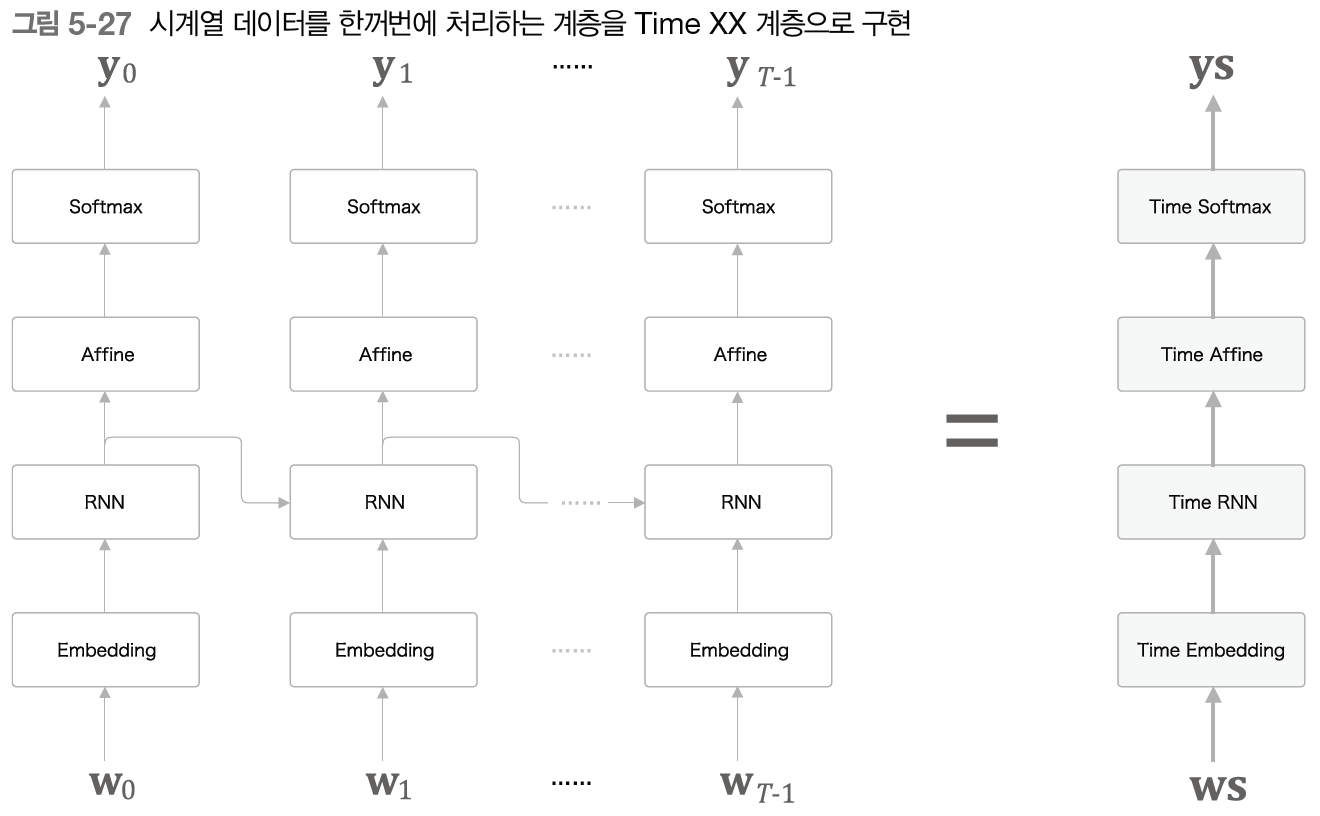

In [10]:
Image("24.png", height = 600, width = 800)

TimeSoftmaxWithLoss 계층을 자세히 살펴보면 길이가 T인 시계열 데이터 하나의 평균 손실을 최종 Loss로 간주한다

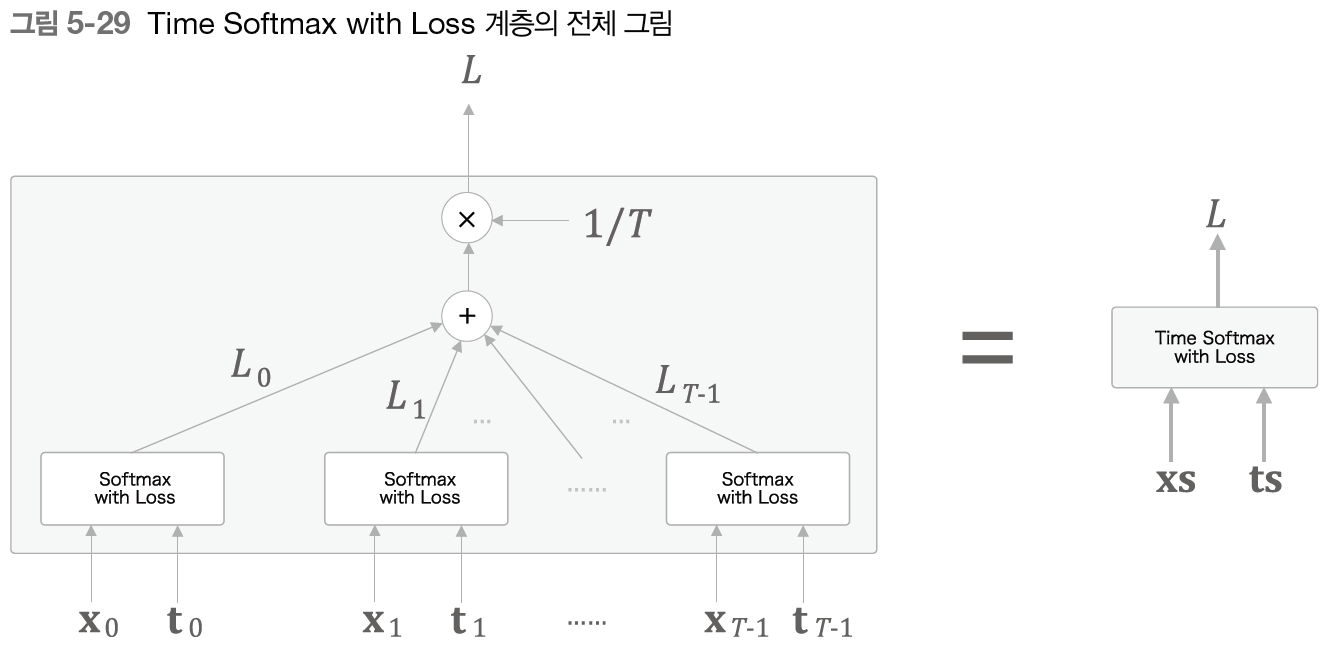

In [11]:
Image("25.png", height = 600, width = 800)

참고로 그냥 SoftmaxWithLoss 계층에서는 미니배치에 해당하는 손실의 평균을 최종 loss로 사용했다   
미니배치 크기가 N이라면,  N개의 손실을 평균해서 최종 Loss로 사용

In [3]:
class TimeEmbedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.layers = None   # 매 타임 임베딩 계층을 담을 그릇 
        self.W = W          # 

    def forward(self, xs):
        N, T = xs.shape    # 배치사이즈 N,  길이가 T인 시계열 데이터    # 10, 5 
        V, D = self.W.shape  # V : vocab 사이즈    D : 임베딩 차원    # 418, 100

        out = np.empty((N, T, D), dtype='f')       # 10, 5, 100
        self.layers = []

        for t in range(T):
            layer = Embedding(self.W)
            out[:, t, :] = layer.forward(xs[:, t])   # 시퀀스의 단어 순서대로 임베딩 가중치 행렬에서 모든 배치에 대해 앞에서부터
                                                     # 순서대로 하나씩 행벡터를 뽑아낸다. 
            self.layers.append(layer)                # 임베딩 계층으로 역전파할 때 사용하기 위해 임베딩 레이어 차례대로 저장 

        return out

    def backward(self, dout):
        N, T, D = dout.shape

        grad = 0
        for t in range(T):
            layer = self.layers[t]
            layer.backward(dout[:, t, :])
            grad += layer.grads[0]

        self.grads[0][...] = grad
        return None

In [4]:
class TimeAffine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        N, T, D = x.shape
        W, b = self.params

        rx = x.reshape(N*T, -1)   # N, T, D  를 N*T, D 로 reshape : 배치 단위로 나뉘어 있는 것들을 하나로 묶어서 2차원 행렬로 바꿈 >>> rx*W+b 어파인변환 해주려고
                                                        #         array([[[ 1,  2],           array([[ 1,  2],  
                                                        #  (2,3,2) shape  [ 3,  4],       (6,2) shape[ 3,  4],
                                                        #    이걸         [ 5,  6]],         이렇게   [ 5,  6],                            
                                                        #                [[ 7,  8],                  [ 7,  8],
                                                        #                 [ 9, 10],                  [ 9, 10],
                                                        #                 [11, 12]]])                [11, 12]])  
        out = np.dot(rx, W) + b
        self.x = x
        return out.reshape(N, T, -1)     # 다시 배치 단위로 나눔 

    def backward(self, dout):
        x = self.x
        N, T, D = x.shape
        W, b = self.params

        dout = dout.reshape(N*T, -1)
        rx = x.reshape(N*T, -1)

        db = np.sum(dout, axis=0)
        dW = np.dot(rx.T, dout)
        dx = np.dot(dout, W.T)
        dx = dx.reshape(*x.shape)

        self.grads[0][...] = dW
        self.grads[1][...] = db

        return dx

In [5]:
class TimeSoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.cache = None
        self.ignore_label = -1   # 이게 왜 있는 거지?????????????????????????????????

    def forward(self, xs, ts):
        N, T, V = xs.shape           # 10, 5, 418

        if ts.ndim == 3:  # 정답 레이블이 원핫 벡터인 경우
            ts = ts.argmax(axis=2)   # 정답의 인덱스를 ts에 저장  ??????? 

        mask = (ts != self.ignore_label)  # ts의 값이 -1이 아닌 원소들은 전부 True로 바꿔 mask에 저장 

        # 배치용과 시계열용을 정리(reshape)
        xs = xs.reshape(N * T, V)          # ????????????????????????????????????????????????????????????????
        ts = ts.reshape(N * T)             # ???????????????????????????????????????????????????????????????
        mask = mask.reshape(N * T)

        ys = softmax(xs)
        ls = np.log(ys[np.arange(N * T), ts])
        ls *= mask  # ignore_label에 해당하는 데이터는 손실을 0으로 설정, 아닌건 그대로.
        loss = -np.sum(ls)
        loss /= mask.sum()  # T개의 데이터 평균 손실

        self.cache = (ts, ys, mask, (N, T, V))
        return loss

    def backward(self, dout=1):
        ts, ys, mask, (N, T, V) = self.cache

        dx = ys
        dx[np.arange(N * T), ts] -= 1
        dx *= dout
        dx /= mask.sum()
        dx *= mask[:, np.newaxis]  # ignore_label에 해당하는 데이터는 기울기를 0으로 설정

        dx = dx.reshape((N, T, V))

        return dx

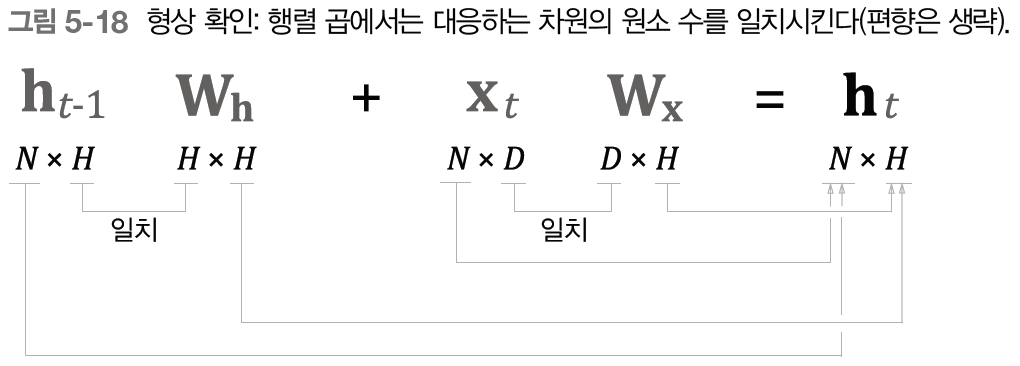

In [57]:
Image("19.png", height = 200, width = 600)

### simple_RNNLM 구현

In [6]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.time_layers import *


class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size    # 418, 100, 100 
        rn = np.random.randn

        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        rnn_Wx = (rn(D, H) / np.sqrt(D)).astype('f')   # xavier 초기값 사용 
        rnn_Wh = (rn(H, H) / np.sqrt(H)).astype('f')   # 이전 계층의 노드가 n개면, 표준편차가 1/루트n 인 분포를 초기값으로 사용
                                                          # 언어모델을 다루는 연구에서는 0.01 * np.random.uniform(...) 처럼
        rnn_b = np.zeros(H).astype('f')                   # 스케일을 변환한 균일분포를 이용하는 사례를 많이 볼 수 있다.
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f') 
        affine_b = np.zeros(V).astype('f')

        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, ts):
        for layer in self.layers:
            xs = layer.forward(xs)
        loss = self.loss_layer.forward(xs, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):                       # 신경망의 상태를 초기화하는 메서드 .
        self.rnn_layer.reset_state()

# 6. 언어모델 학습

PTB 데이터셋으로 훈련. 1000개 단어만 사용.  (전부를 대상으로 학습하면 기울기 소실로 학습X)

말뭉치 크기: 1000, 어휘 수: 418
| 에폭 1 | 퍼플렉서티 419.82
| 에폭 2 | 퍼플렉서티 341.72
| 에폭 3 | 퍼플렉서티 450.87
| 에폭 4 | 퍼플렉서티 366.81
| 에폭 5 | 퍼플렉서티 327.56
| 에폭 6 | 퍼플렉서티 324.69
| 에폭 7 | 퍼플렉서티 361.54
| 에폭 8 | 퍼플렉서티 391.57
| 에폭 9 | 퍼플렉서티 307.84
| 에폭 10 | 퍼플렉서티 315.43
| 에폭 11 | 퍼플렉서티 273.77
| 에폭 12 | 퍼플렉서티 1003.46
| 에폭 13 | 퍼플렉서티 387.22
| 에폭 14 | 퍼플렉서티 350.70
| 에폭 15 | 퍼플렉서티 286.20
| 에폭 16 | 퍼플렉서티 235.26
| 에폭 17 | 퍼플렉서티 215.36
| 에폭 18 | 퍼플렉서티 173.20
| 에폭 19 | 퍼플렉서티 148.95
| 에폭 20 | 퍼플렉서티 119.45
| 에폭 21 | 퍼플렉서티 95.94
| 에폭 22 | 퍼플렉서티 78.78
| 에폭 23 | 퍼플렉서티 60.65
| 에폭 24 | 퍼플렉서티 50.59
| 에폭 25 | 퍼플렉서티 41.64
| 에폭 26 | 퍼플렉서티 32.64
| 에폭 27 | 퍼플렉서티 25.77
| 에폭 28 | 퍼플렉서티 21.44
| 에폭 29 | 퍼플렉서티 19.70
| 에폭 30 | 퍼플렉서티 18.25
| 에폭 31 | 퍼플렉서티 14.11
| 에폭 32 | 퍼플렉서티 11.68
| 에폭 33 | 퍼플렉서티 9.26
| 에폭 34 | 퍼플렉서티 9.70
| 에폭 35 | 퍼플렉서티 8.81
| 에폭 36 | 퍼플렉서티 6.82
| 에폭 37 | 퍼플렉서티 5.78
| 에폭 38 | 퍼플렉서티 5.41
| 에폭 39 | 퍼플렉서티 4.91
| 에폭 40 | 퍼플렉서티 4.01
| 에폭 41 | 퍼플렉서티 3.93
| 에폭 42 | 퍼플렉서티 3.29
| 에폭 43 | 퍼플렉서티 2.97
| 에폭 44 | 퍼플렉서티 2.80
| 에폭 45 

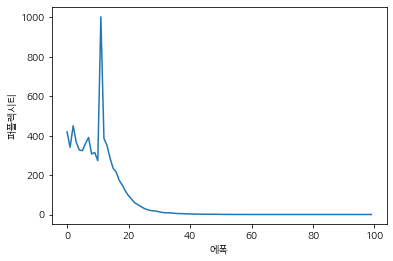

In [14]:
# coding: utf-8
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
# from simple_rnnlm import SimpleRnnlm


# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 5  #  시계열 길이 (총 타임스텝)
lr = 0.95
max_epoch = 100

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000  # 전체 중 1000개만
corpus = corpus[:corpus_size]   # 0부터 999까지 
vocab_size = int(max(corpus) + 1)  # 418

xs = corpus[:-1]  # len(xs) :999  입력 (마지막 단어는 제외)              # 0부터 998까지  
ts = corpus[1:]  #                출력（정답 레이블）첫번째 단어는 제외    # 1부터 999까지 

data_size = len(xs)  # 999
print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)  # 999 // 50 = 19
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# 미니배치의 각 샘플의 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size        # 999 // 10 = 99
offsets = [i * jump for i in range(batch_size)] # [0, 99, 198, 297, 396, 495, 594, 693, 792, 891]
                                              # 각 미니 배치가 데이터를 읽는 시작 위치를 계산해 offsets에 저장 
                                              # offset : 데이터를 읽는 시작 위치 

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 미니배치 취득
        batch_x = np.empty((batch_size, time_size), dtype='i')  # (10,5) 쓰레기값이 들어가 있는 배열 
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):  # 말뭉치를 읽는 위치가 말뭉치 크기를 넘어서는 경우 말뭉치 처음으로 돌아옴 
                batch_x[i, t] = xs[(offset + time_idx) % data_size] # batch_x[0, 0] = xs[0], 
                batch_t[i, t] = ts[(offset + time_idx) % data_size] # batch_x[1, 0] = xs[99],
            time_idx += 1   # (10,5) 미니배치 하나 다 만들면  4        # batch_x[2, 0] = xs[198],...
                            # 그 다음 미니배치는 xs[5]부터 시작        # batch_x[9, 0] = xs[891]  안에 있는 for문 다 돌면
                            # 이걸 19번 반복하면 1에폭                 # time_idx에 1 더해주고 
                            # 2에폭 첫 iter에서  time_idx = 95        # batch_x[0, 1] = xs[1],
                           # 100 에폭이면 time_idx = 9500             # batch_x[1, 1] = xs[100],
        # 기울기를 구하여 매개변수 갱신                                 # batch_x[2, 1] = xs[199],...
        loss = model.forward(batch_x, batch_t)                      # batch_x[9, 1] = xs[892] 다시 time_idx에 1 더해주고 
        model.backward()                                            # batch_x[0, 2] = xs[2],...
        optimizer.update(model.params, model.grads)
        total_loss += loss  # 길이 5의 시퀀스의 평균 Loss를 1에폭 동안 누적 
        loss_count += 1    # 1에폭의 평균 loss 계산 

    # 에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count) # 한 에폭의 ppl 계산 
    print('| 에폭 %d | 퍼플렉서티 %.2f' # 에폭마다 퍼플렉시티 출력
          % (epoch+1, ppl))                                                            
    ppl_list.append(float(ppl))    # 그래프로 그리기 위해 한 에폭당 PPL 값 저장 
    total_loss, loss_count = 0, 0  # 한 에폭 끝나면 초기화 

# 그래프 그리기
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('에폭')
plt.ylabel('퍼플렉시티')
plt.show()

In [22]:
model.layers[0].W.shape  # TimeEmbedding V, D

(418, 100)

In [12]:
model.layers[1].h.shape  # TimeRNN  Ht  <<< 이걸 다섯 번 돌려서 

(10, 100)

In [22]:
N, T, D = 10, 5, 100
hs = np.empty((N, T, H), dtype='f')
print(hs.shape)
t = 0
hs[:, t, :] = model.layers[1].h
print(hs.shape)

(10, 5, 100)
(10, 5, 100)


In [14]:
model.layers[2].x.shape  # TimeAffine 계층의 입력값 N, T, D

(10, 5, 100)

In [8]:
time_idx

9500

In [154]:
batch_x  # 첫 배치 입력

array([[  0,   1,   2,   3,   4],
       [ 42,  76,  77,  64,  78],
       [ 26,  26,  98,  56,  40],
       [ 24,  32,  26, 175,  98],
       [208, 209,  80, 197,  32],
       [ 26,  79,  26,  80,  32],
       [274, 275, 276,  42,  61],
       [ 88, 303,  26, 304,  26],
       [ 42,  35,  72, 350,  64],
       [339, 359, 181, 328, 386]], dtype=int32)

In [155]:
batch_t   # 첫 배치 레이블

array([[  1,   2,   3,   4,   5],
       [ 76,  77,  64,  78,  79],
       [ 26,  98,  56,  40, 128],
       [ 32,  26, 175,  98,  61],
       [209,  80, 197,  32,  82],
       [ 79,  26,  80,  32, 241],
       [275, 276,  42,  61,  24],
       [303,  26, 304,  26,  32],
       [ 35,  72, 350,  64,  27],
       [359, 181, 328, 386, 387]], dtype=int32)

In [141]:
xs[:100]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 27, 24, 39, 26, 40, 41, 42, 26, 43, 32, 44, 45,
       46, 24, 47, 26, 27, 28, 29, 48, 49, 41, 42, 50, 51, 52, 53, 54, 55,
       35, 36, 37, 42, 56, 57, 58, 59, 24, 35, 60, 42, 61, 62, 63, 64, 65,
       66, 67, 68, 69, 70, 35, 71, 72, 42, 73, 74, 75, 35, 46, 42])

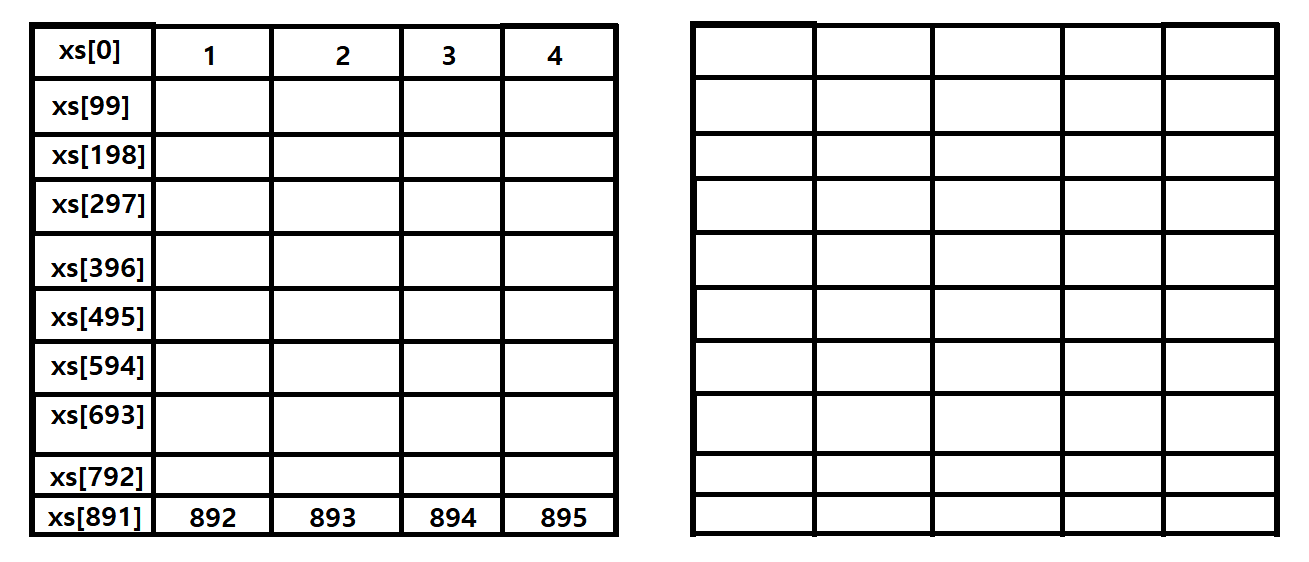

In [171]:
Image("26.png", height = 200, width = 600)

### 퍼플렉시티

perplexity : 이해할 수 없어 혼란스러움   
따라서 퍼플렉시티가 낮은 게 좋다   

### 퍼플렉시티 : 확률의 역수 ( 이 해석은 입력 데이터 수가 하나 일 때 정확히 일치한다)   

언어모델은 과거 정보(단어)로부터 다음에 출현할 단어의 확률분포를 출력한다   
어떤 모델에 you 라는 단어를 주었을 때 다음과 같은 확률분포를 출력했다면 

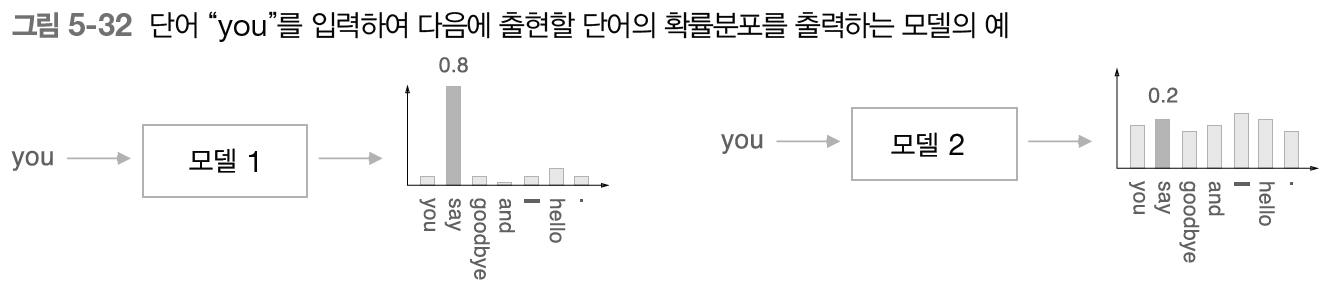

In [174]:
Image("27.png")

모델 1의 경우엔 퍼플렉시티가 1/0.8 = 1.25   
모델 2의 경우엔 퍼플렉시티가 1/0.2 = 5 이다

### 퍼플렉시티 값은 분기수 Number of branches 로 해석할 수 있다

1.25라는 건 다음에 출현할 수 있는 단어의 후보를 1.25개 정도로 좁혔다는 걸 의미.   
퍼플렉시티의 최소값은 1.0이다.

문제는 입력데이터가 여러개일 경우다 

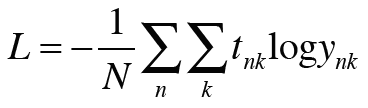

In [176]:
Image("28.png")

    N은 데이터의 총 개수
    tn은 원핫벡터로 나타낸 정답레이블
    tn은 n개째 데이터의 k번째 값
    ynk는 확률분포(소프트맥스의 출력)
    
교차 엔트로피 오차 수식과 완전히 똑같다.
Loss를 e의 지수로 넣어서 계산한 값이 곧 퍼플렉시티다. 

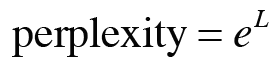

In [177]:
Image("29.png")

# 7. RNNLM의 Trainer 클래스

| 에폭 1 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 419.57
| 에폭 2 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 371.15
| 에폭 3 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 258.01
| 에폭 4 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 223.31
| 에폭 5 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 210.24
| 에폭 6 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 209.23
| 에폭 7 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 201.42
| 에폭 8 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 200.90
| 에폭 9 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 195.51
| 에폭 10 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 191.39
| 에폭 11 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 193.28
| 에폭 12 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 188.95
| 에폭 13 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 193.09
| 에폭 14 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 188.13
| 에폭 15 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 187.17
| 에폭 16 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 190.52
| 에폭 17 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 189.17
| 에폭 18 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 184.67
| 에폭 19 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 181.61
| 에폭 20 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 181.58
| 에폭 21 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 179.56
| 에폭 22 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 179.

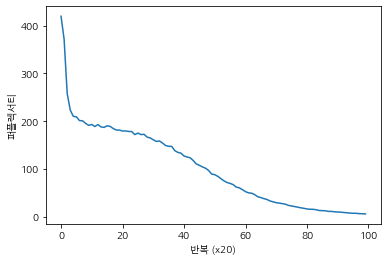

In [13]:
# coding: utf-8
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from dataset import ptb


# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 5  # RNN을 펼치는 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000  # 테스트 데이터셋을 작게 설정
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)
xs = corpus[:-1]  # 입력
ts = corpus[1:]  # 출력（정답 레이블）

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size)
trainer.plot()


In [180]:
class RnnlmTrainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.time_idx = None
        self.ppl_list = None
        self.eval_interval = None
        self.current_epoch = 0

    def get_batch(self, x, t, batch_size, time_size):
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')

        data_size = len(x)
        jump = data_size // batch_size
        offsets = [i * jump for i in range(batch_size)]  # 배치에서 각 샘플을 읽기 시작하는 위치

        for time in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, time] = x[(offset + self.time_idx) % data_size]
                batch_t[i, time] = t[(offset + self.time_idx) % data_size]
            self.time_idx += 1
        return batch_x, batch_t

    def fit(self, xs, ts, max_epoch=10, batch_size=20, time_size=35,
            max_grad=None, eval_interval=20):
        data_size = len(xs)
        max_iters = data_size // (batch_size * time_size)
        self.time_idx = 0
        self.ppl_list = []
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            for iters in range(max_iters):
                batch_x, batch_t = self.get_batch(xs, ts, batch_size, time_size)

                # 기울기를 구해 매개변수 갱신
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 공유된 가중치를 하나로 모음
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 퍼플렉서티 평가
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    ppl = np.exp(total_loss / loss_count)
                    elapsed_time = time.time() - start_time
                    print('| 에폭 %d |  반복 %d / %d | 시간 %d[s] | 퍼플렉서티 %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, ppl))
                    self.ppl_list.append(float(ppl))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.ppl_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.ppl_list, label='train')
        plt.xlabel('반복 (x' + str(self.eval_interval) + ')')
        plt.ylabel('퍼플렉서티')
        plt.show()


In [181]:
def remove_duplicate(params, grads):
    '''
    매개변수 배열 중 중복되는 가중치를 하나로 모아
    그 가중치에 대응하는 기울기를 더한다.
    '''
    params, grads = params[:], grads[:]  # copy list

    while True:
        find_flg = False
        L = len(params)

        for i in range(0, L - 1):
            for j in range(i + 1, L):
                # 가중치 공유 시
                if params[i] is params[j]:
                    grads[i] += grads[j]  # 경사를 더함
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)
                # 가중치를 전치행렬로 공유하는 경우(weight tying)
                elif params[i].ndim == 2 and params[j].ndim == 2 and \
                     params[i].T.shape == params[j].shape and np.all(params[i].T == params[j]):
                    grads[i] += grads[j].T
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)

                if find_flg: break
            if find_flg: break

        if not find_flg: break

    return params, grads

In [182]:
def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    rate = max_norm / (total_norm + 1e-6)
    if rate < 1:
        for grad in grads:
            grad *= rate